In [1]:
import sys
sys.path.append("/home/aunai/build_phare")
sys.path.append("/home/aunai/PHARE/pyphare/")

In [2]:
import os
import numpy as np
import pyphare
from pyphare.pharesee.hierarchy import hierarchy_from
from pyphare.pharesee.plotting import zoom_effect
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.pharesee.hierarchy import compute_hier_from
%matplotlib notebook

In [3]:
#some temporary function to get times in h5 file
import h5py
path = "../phare_jobs/tests/functional/alfven_wave/alfven_refine/EM_B.h5"
def get_times(path):
    f = h5py.File(path, "r")
    times=[]
    for k in f.keys():
        times.append(float(k.strip("t")))
    f.close()
    return times

In [63]:
def plot_job(job, time, qty, file_idx=None,**kwargs):
    path = os.path.join(main_jobs_path, job)
    r = Run(path)
    t=time        
    B = r.GetB(t)
    N = r.GetNi(t)
    V = r.GetVi(t)
    if qty in ("Bx","By","Bz"):
        self = B
    if qty == "rho":
        self = N
    if qty in ("Vx", "Vy", "Vz"):
        self = V
    fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex=True)
    colors = ["k", "b", "r"]
    for ilvl, lvl in self.patch_levels.items():
        for pidx, patch in enumerate(lvl.patches):
            pdata  = patch.patch_datas[qty]
            x,v = finest_data(pdata, ilvl, self)
            ax1.plot(x, v,label="lev{} - patch{}".format(ilvl, pidx),
                     marker='o', markersize=2, color=colors[ilvl])

    for ilvl,level in B.patch_levels.items():
        for patch in level.patches:
            dx = patch.dx
            x0 = patch.origin[0]
            x1 = (patch.box.upper[0]+1)*dx
            ax2.axvspan(x0, x1, color='b',ec='k', alpha=0.2,
                        ymin=ilvl/4, ymax=(ilvl+1)/4)

    ax1.set_title("{} at t = {}".format(job,t))

    ax1.set_ylim(kwargs.get("ylim",(-3.5, 3.5)))

    ax1.set_xlim(kwargs.get("xlim", (0,500)))
    if file_idx is not None:
        fig.savefig(path+'/'+job+"_"+qty+"_{:04d}.png".format(file_idx))
        plt.close(fig)
    return fig, ax1, ax2

# Comparaison with Heckle

In [7]:
sys.path.https://hephaistos.lpp.polytechnique.fr/jupyter/user/aunai/notebooks/pharebook/tangential.ipynbappend("/home/aunai/")
main_jobs_path = "../phare_jobs/tests/functional/translation/"

In [8]:
import pywi.runs.heckle as heckle

In [30]:
r = heckle.Heckle("/home/aunai/phare_jobs/heckle_ref/td/")

In [31]:
B0 = r.GetB(0)
B20 = r.GetB(20)
x = r.GetCoords(axis=0)

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


### Heckle VS PHARE without refinement

In this test we initialize both heckle and PHARE with a tangential discontinuity in a global flow $V_x=2$. PHARE is used without refinement so the comparison is just about the numerical properties of the codes and the fact that PHARE uses patches.

<IPython.core.display.Javascript object>


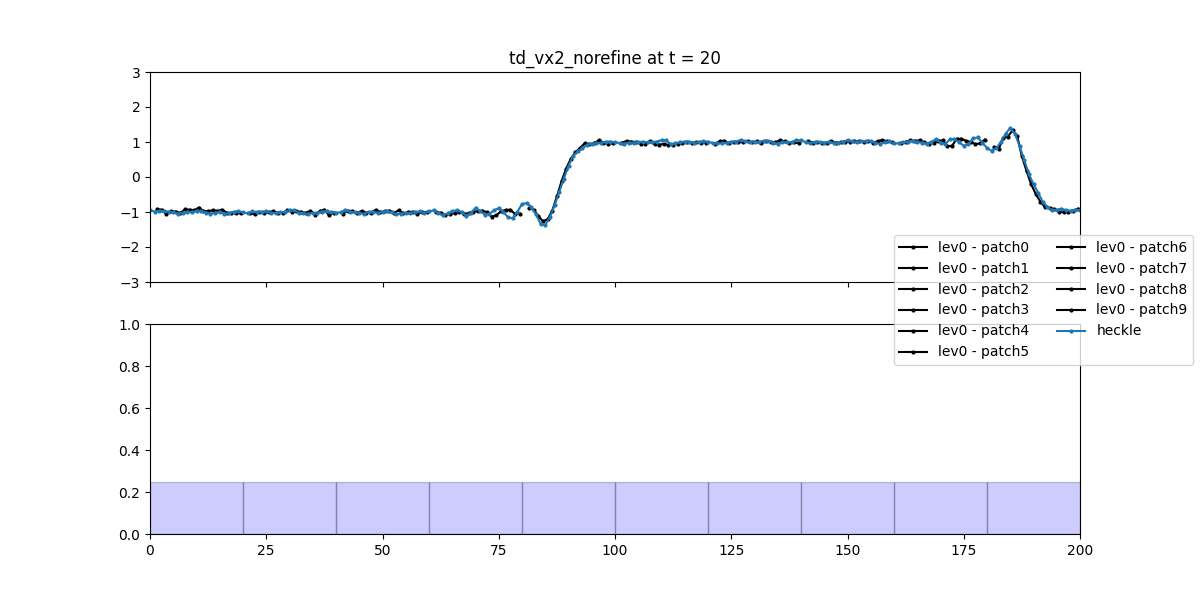

In [36]:
fig,ax1,ax2 = plot_job("td_vx2_norefine", 20, "By", ylim=(-3,3),xlim=(0,200))
ax1.plot(x, B20[:,1], label = "heckle", marker="o", markersize=2)
fig.legend(ncol=2, loc="right")

### Heckle VS PHARE with 3 fixed refinement levels

This is the same test as just above but this time with fixed mesh refinement. We can see that not only PHARE and Heckle give the same evolution down to small oscilations at the leading and trailing discontinuities. This run also confirms the benefit of having mesh refinement by comparing the trailing discontinuity refined in PHARE and not refined in Heckle.

<IPython.core.display.Javascript object>


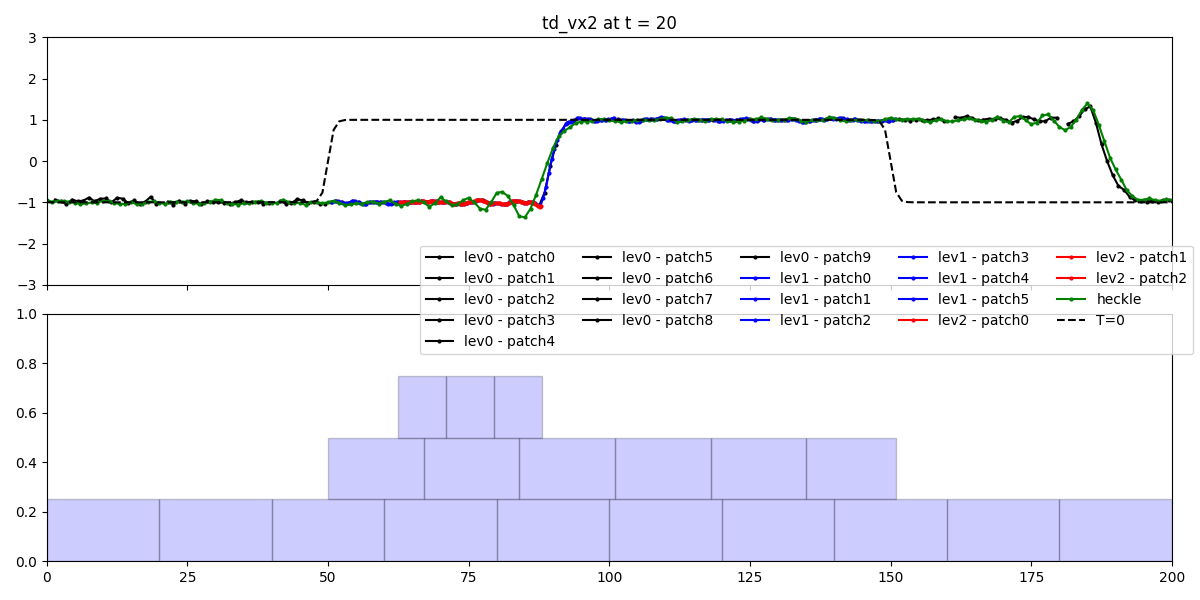

In [39]:
fig,ax1,ax2 = plot_job("td_vx2", 20, "By", ylim=(-3,3),xlim=(0,200))
ax1.plot(x, B20[:,1], label = "heckle", marker="o", markersize=2, color="g")
ax1.plot(x, B0[:,1], label = "T=0",  color="k", ls="--")
fig.legend(ncol=5,loc="center right")
fig.tight_layout()

In [ ]:
for it,t in enumerate(np.arange(0.,20,0.1)):
    fig,ax1,ax2 = plot_job("td_vx2", t, "By", it, ylim=(-3,3),xlim=(0,200))
    ax1.plot(x, r.GetB(t)[:,1], label = "heckle", marker="o", markersize=2, color="g")
    ax1.plot(x, B0[:,1], label = "T=0",  color="k", ls="--")
    fig.legend(ncol=5,loc="center right")
    fig.tight_layout()
    fig.savefig("compare_{:04d}.png".format(it))

In [69]:
B0 = r.GetB(0)
B20 = r.GetB(20)
x = r.GetCoords(axis=0)

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


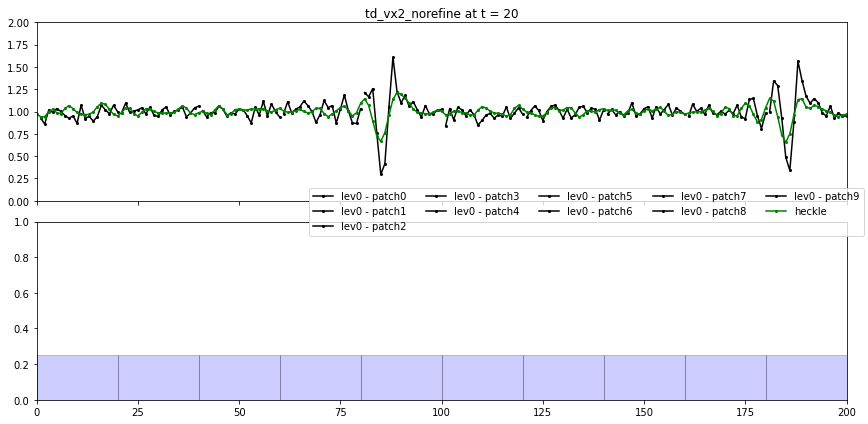

In [168]:
fig, ax1,ax2 = plot_job("td_vx2_norefine", 20, "rho", ylim=(0,2),xlim=(0,200))
ax1.plot(x, r.GetNi(20), marker="o", markersize=2, label="heckle", color="g")
fig.legend(ncol=5,loc="center right")
fig.tight_layout()

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


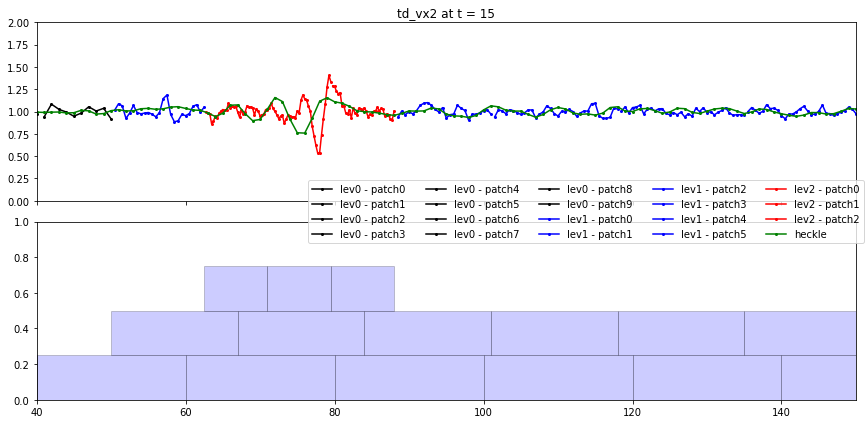

In [176]:
fig, ax1,ax2 = plot_job("td_vx2", 15, "rho", ylim=(0,2),xlim=(40,150))
ax1.plot(x, r.GetNi(15), marker="o", markersize=2, label="heckle", color="g")
fig.legend(ncol=5,loc="center right")
fig.tight_layout()

### Shock wave without refinement

In this test we initialize both Heckle and PHARE with a uniform ($n=1$) density, uniform ($T=.01$) temperature, and a jump from 0.125 to 4 in the magnetic field component $B_y$. This sudden jump in the magnetic pressure should push the plasma outward and lead to the formation of a perpendicular shock wave .

The goal of this test is to see to what extent the solution is the same in heckle and PHARE

In [28]:
r = heckle.Heckle("/home/aunai/phare_jobs/heckle_ref/shock/")
main_jobs_path = "../phare_jobs/tests/functional/shock/"

<IPython.core.display.Javascript object>


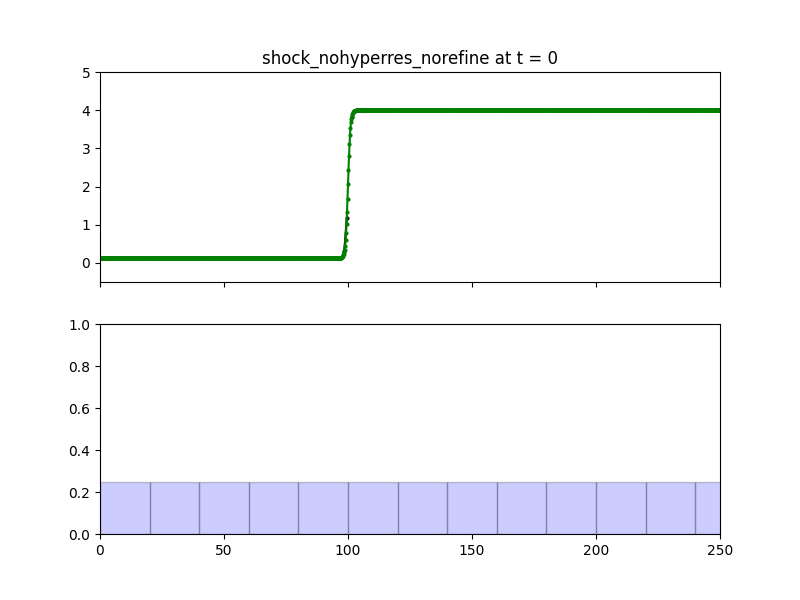

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [31]:
fig,ax1, ax2 = plot_job("shock_nohyperres_norefine", 0, "By", ylim=(-0.5,5), xlim=(0,250))
ax1.plot(r.GetCoords(axis=0), r.GetB(0)[:,1], marker='o', markersize=2, color="g")

After some tests it seems $\Delta x = 1$ is unstable with PHARE even with $\nu=0.01$ and decreasing the time step does not help, while Heckle seems ok with it even with $\nu=0.0001$. The difference might lie in the density smoothing Heckle performs after deposit and that PHARE does not do. In the following we therefore use $\Delta x=0.2$ for both heckle and PHARE and obtain the same results. Further investigations could be necessary to see what's the max mesh size we could use and why...

<IPython.core.display.Javascript object>


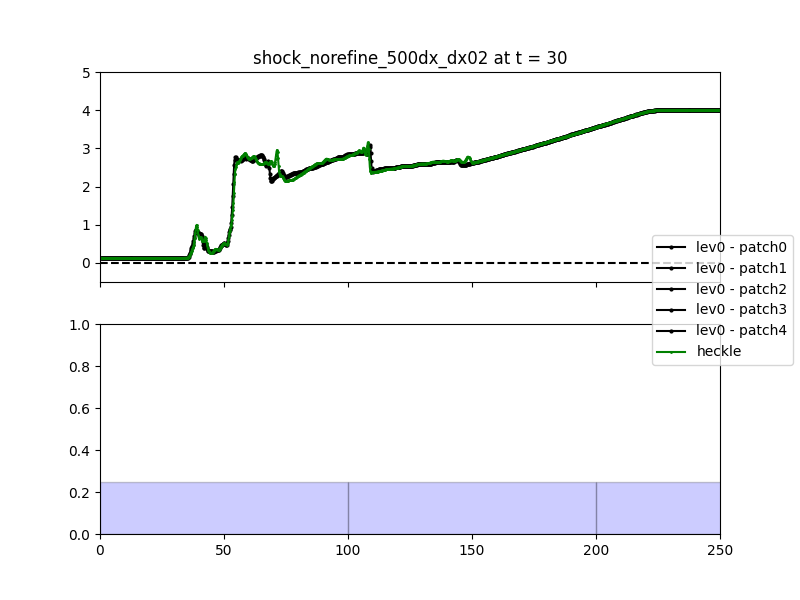

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [43]:
fig,ax1, ax2 = plot_job("shock_norefine_500dx_dx02", 30, "By", ylim=(-0.5,5), xlim=(0,250))
ax1.plot(r.GetCoords(axis=0), r.GetB(30)[:,1], marker='o', markersize=1, color="g", label="heckle")
ax1.axhline(ls='--', color='k')
fig.legend(loc="center right")

Below is the same run for heckle but we have changed the smallest patch size in PHARE to be 20 cells. This ensures the solution is independant of the number of patches, and hence patch boundaries are no problem. Note the random seed is different between the two runs of PHARE which may explain the very faint differences, but the solution is very much the same.

<ipython-input-5-f458918e2e73>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex=True)


<IPython.core.display.Javascript object>


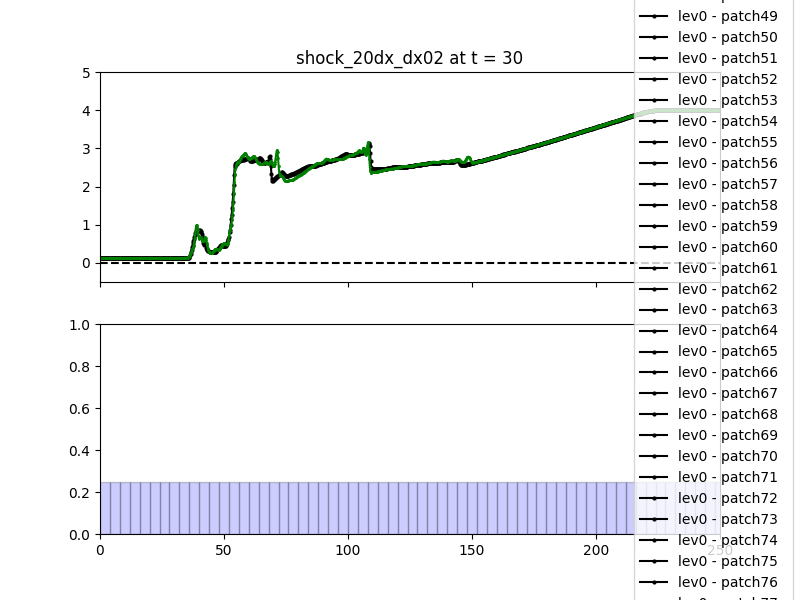

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [45]:
fig,ax1, ax2 = plot_job("shock_20dx_dx02", 30, "By", ylim=(-0.5,5), xlim=(0,250))
ax1.plot(r.GetCoords(axis=0), r.GetB(30)[:,1], marker='o', markersize=1, color="g", label="heckle")
ax1.axhline(ls='--', color='k')
fig.legend(loc="center right")

below is the density in both Heckle and PHARE at $T=30$. while globally the same, the main difference probably comes from the smoothing used in Heckle and not in PHARE.

<ipython-input-5-f458918e2e73>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex=True)


<IPython.core.display.Javascript object>


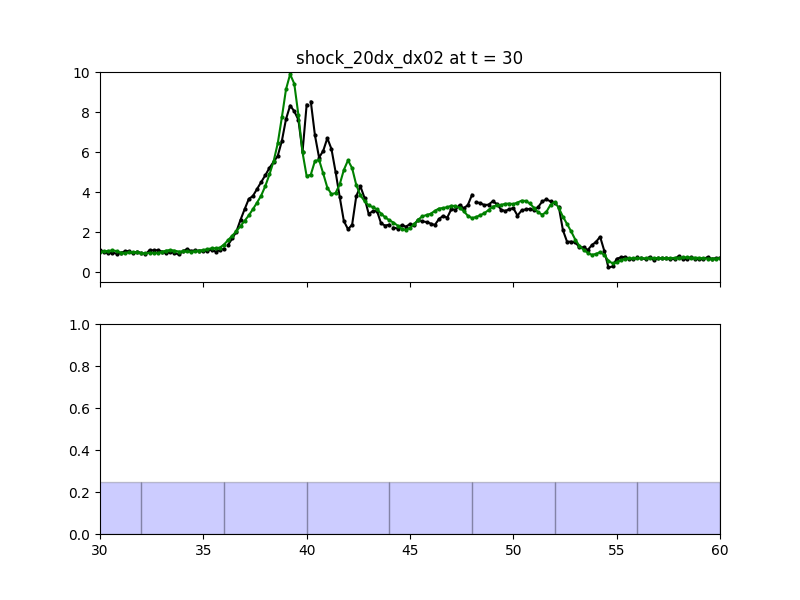

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [51]:
fig,ax1, ax2 = plot_job("shock_20dx_dx02", 30, "rho", ylim=(-0.5,10), xlim=(30,60))
ax1.plot(r.GetCoords(axis=0), r.GetNi(30), marker='o', markersize=2, color="g")

In [ ]:
#movie
for it,t in enumerate(np.arange(0.,30,0.1)):
    fig,ax1, ax2 = plot_job("shock_norefine_500dx_dx02", t, "By", ylim=(-0.5,5), xlim=(0,250))
    ax1.plot(r.GetCoords(axis=0), r.GetB(t)[:,1], marker='o', markersize=1, color="g", label="heckle")
    ax1.axhline(ls='--', color='k')
    fig.legend(loc="center right")
    fig.tight_layout()
    fig.savefig("compare_shock_{:04d}.png".format(it))

### Shock wave comparison between Heckle and PHARE with fixed refinement

In this run, Heckle still has a resolution $\Delta x = 0.2$ but the coarsest resolution in PHARE is $\Delta x=0.5$. One can see tthe two codes are ok when the shock wave still propagates in the refined region ($\Delta x=0.25$ or $\Delta x= 0.125$) but quickly deteriorates as it enters in the non refined region.

<IPython.core.display.Javascript object>


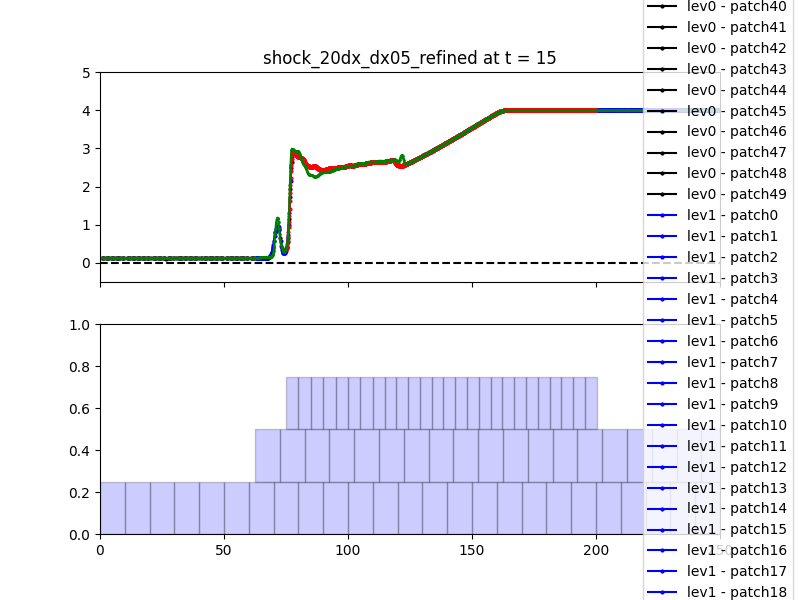

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [61]:
fig,ax1, ax2 = plot_job("shock_20dx_dx05_refined", 15, "By", ylim=(-0.5,5), xlim=(0,250))
ax1.plot(r.GetCoords(axis=0), r.GetB(15)[:,1], marker='o', markersize=1, color="g", label="heckle")
ax1.axhline(ls='--', color='k')
fig.legend(loc="center right")

<IPython.core.display.Javascript object>


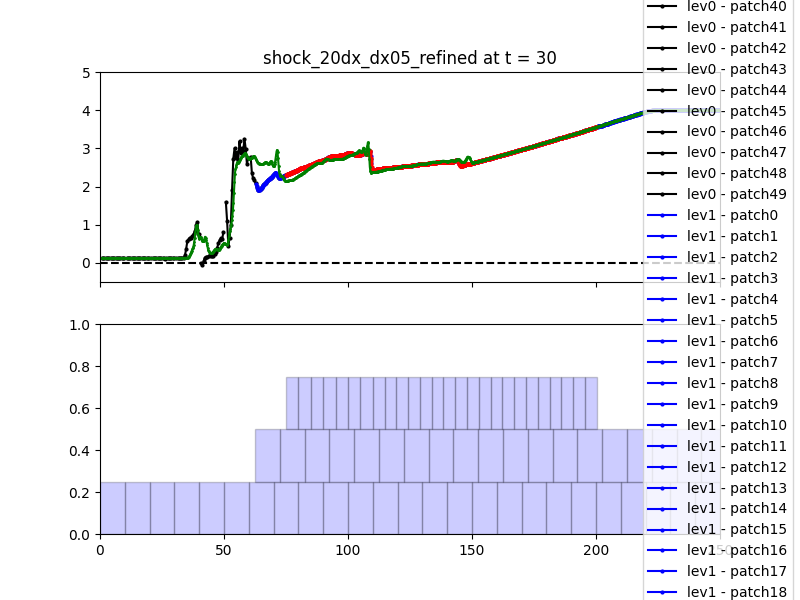

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [57]:
fig,ax1, ax2 = plot_job("shock_20dx_dx05_refined", 30, "By", ylim=(-0.5,5), xlim=(0,250))
ax1.plot(r.GetCoords(axis=0), r.GetB(30)[:,1], marker='o', markersize=1, color="g", label="heckle")
ax1.axhline(ls='--', color='k')
fig.legend(loc="center right")

In [ ]:
#movie
for it,t in enumerate(np.arange(0.,30,0.1)):
    fig,ax1, ax2 = plot_job("shock_20dx_dx05_refined", t, "By", ylim=(-0.5,5), xlim=(0,250))
    ax1.plot(r.GetCoords(axis=0), r.GetB(t)[:,1], marker='o', markersize=1, color="g", label="heckle")
    ax1.axhline(ls='--', color='k')
    fig.legend(loc="center right")
    fig.tight_layout()
    fig.savefig("compare_shock_{:04d}.png".format(it))
    plt.close(fig)

In the case below we only add one refined level. L0 now has a $\Delta x=0.2$ and L1 has $\Delta x=0.1$. We see both code show again the same features at T=30.

<IPython.core.display.Javascript object>


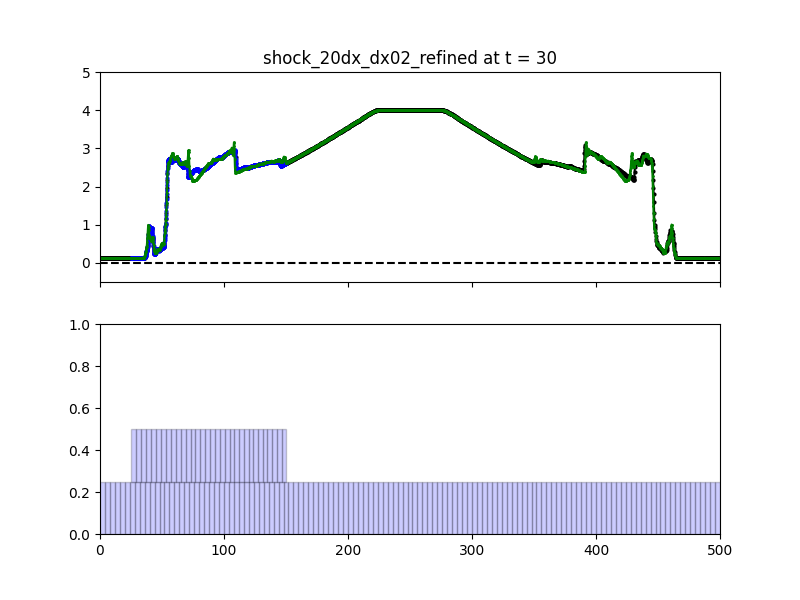

/home/aunai/pywi/runs/heckle.py:158: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = f[mygroups+'/'+fieldname].value


In [62]:
fig,ax1, ax2 = plot_job("shock_20dx_dx02_refined", 30, "By", ylim=(-0.5,5), xlim=(0,500))
ax1.plot(r.GetCoords(axis=0), r.GetB(30)[:,1], marker='o', markersize=1, color="g", label="heckle")
ax1.axhline(ls='--', color='k')
#fig.legend(loc="center right")